In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,f1_score,precision_score,recall_score,classification_report
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
# Load the data

data = pd.read_csv("Train.csv")

In [3]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
data.shape

(10999, 12)

In [5]:
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [7]:
# Counting Null values
data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [8]:
# Counting Duplicates
data.duplicated().sum()

0

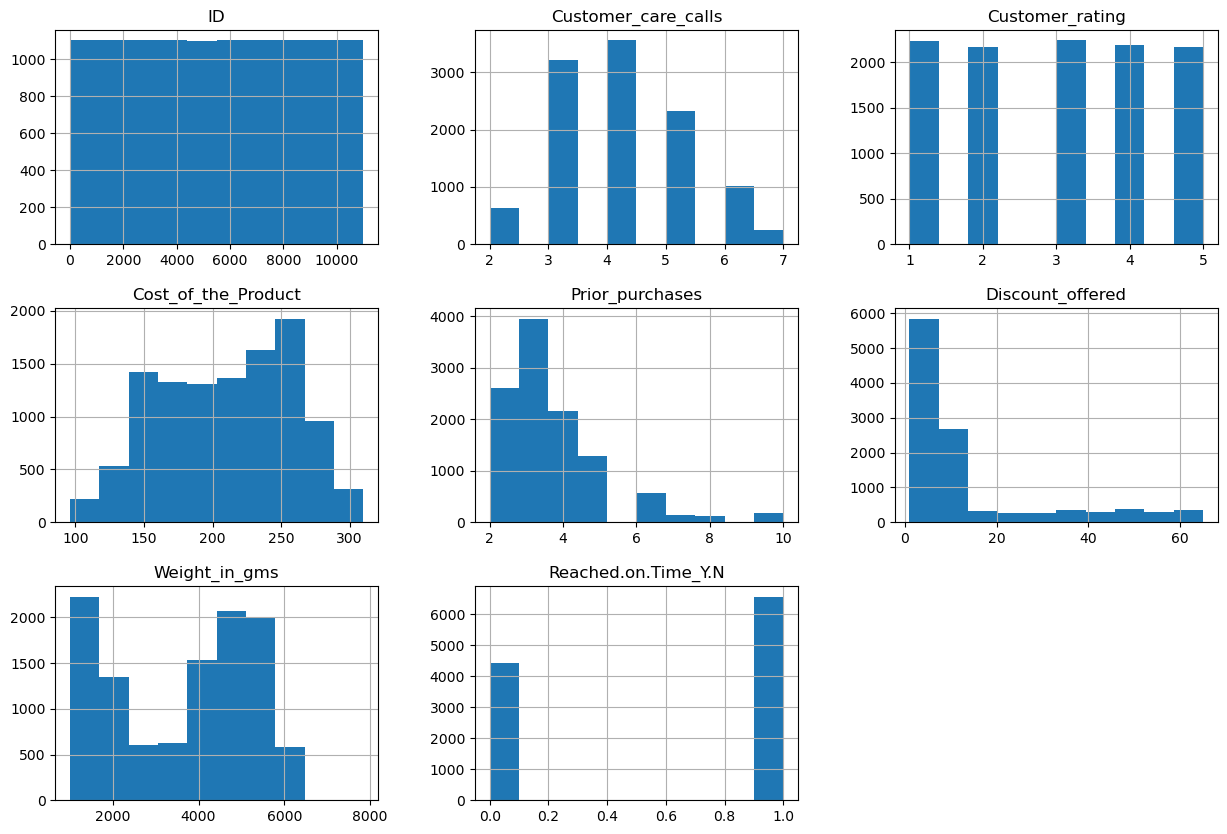

In [107]:
# Univariate analysis

data.select_dtypes(include=[np.number]).hist(bins=10,figsize=(15,10))
plt.show()

In [108]:
# Bivariate Analysis

data.corr(numeric_only=True)

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,1.000000,0.188998,-0.005722,0.196791,0.145369,-0.598278,0.278312,-0.411822
Customer_care_calls,0.188998,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,-0.005722,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.196791,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.145369,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.598278,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,0.278312,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.411822,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


<Axes: xlabel='Discount_offered', ylabel='Cost_of_the_Product'>

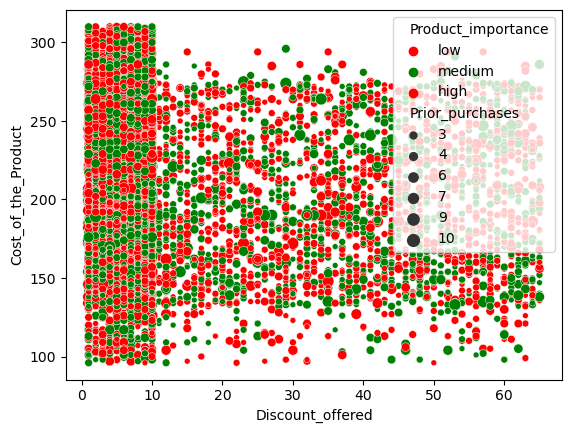

In [109]:
# Scatterplot

sns.scatterplot(x='Discount_offered', y='Cost_of_the_Product',data=data,hue='Product_importance',size='Prior_purchases', palette=['red','green'])

<Axes: >

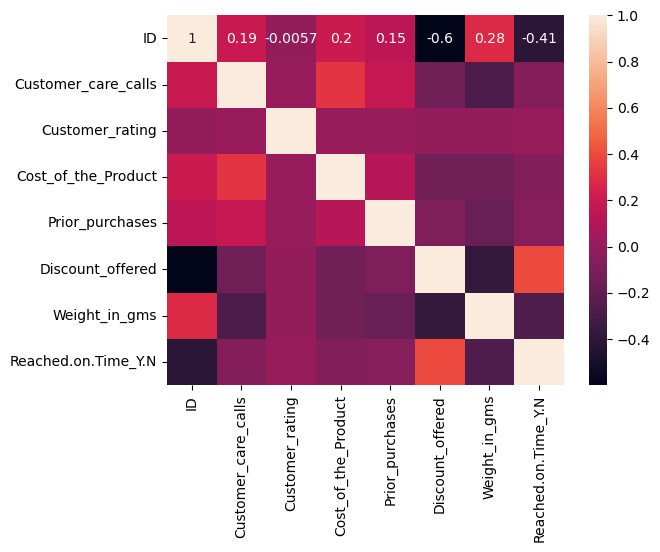

In [110]:
# Multivariate Analysis
# Heatmap

hm=data.corr(numeric_only=True)
sns.heatmap(hm,annot=True)

# Numerical and Categorical columns will be separated

### Categorical Columns

In [9]:
cat_col = [clm for clm in data.columns if data[clm].dtype == "O"]
cat_col

['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

In [10]:
Categorical_col = data[cat_col]
Categorical_col.head()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,D,Flight,low,F
1,F,Flight,low,M
2,A,Flight,low,M
3,B,Flight,medium,M
4,C,Flight,medium,F


In [11]:
Categorical_col.shape

(10999, 4)

### *Encoding the categorical variables

In [12]:
le = LabelEncoder()

In [13]:
def Label_Enc(col):
  Categorical_col[col] = le.fit_transform(Categorical_col[col])

In [14]:
for i in ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']:
  Label_Enc(i)

In [15]:
Categorical_col.head()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,3,0,1,0
1,4,0,1,1
2,0,0,1,1
3,1,0,2,1
4,2,0,2,0


### Numerical Columns

In [16]:
num_col = [clm for clm in data.columns if data[clm].dtype != "O"]
num_col

['ID',
 'Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms',
 'Reached.on.Time_Y.N']

In [17]:
Numerical_col = data[num_col]
Numerical_col.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,4,2,177,3,44,1233,1
1,2,4,5,216,2,59,3088,1
2,3,2,2,183,4,48,3374,1
3,4,3,3,176,4,10,1177,1
4,5,2,2,184,3,46,2484,1


In [18]:
Numerical_col.shape

(10999, 8)

In [19]:
Numerical_col.drop(columns = ["ID"],axis = 1,inplace = True)
Numerical_col.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,2,177,3,44,1233,1
1,4,5,216,2,59,3088,1
2,2,2,183,4,48,3374,1
3,3,3,176,4,10,1177,1
4,2,2,184,3,46,2484,1


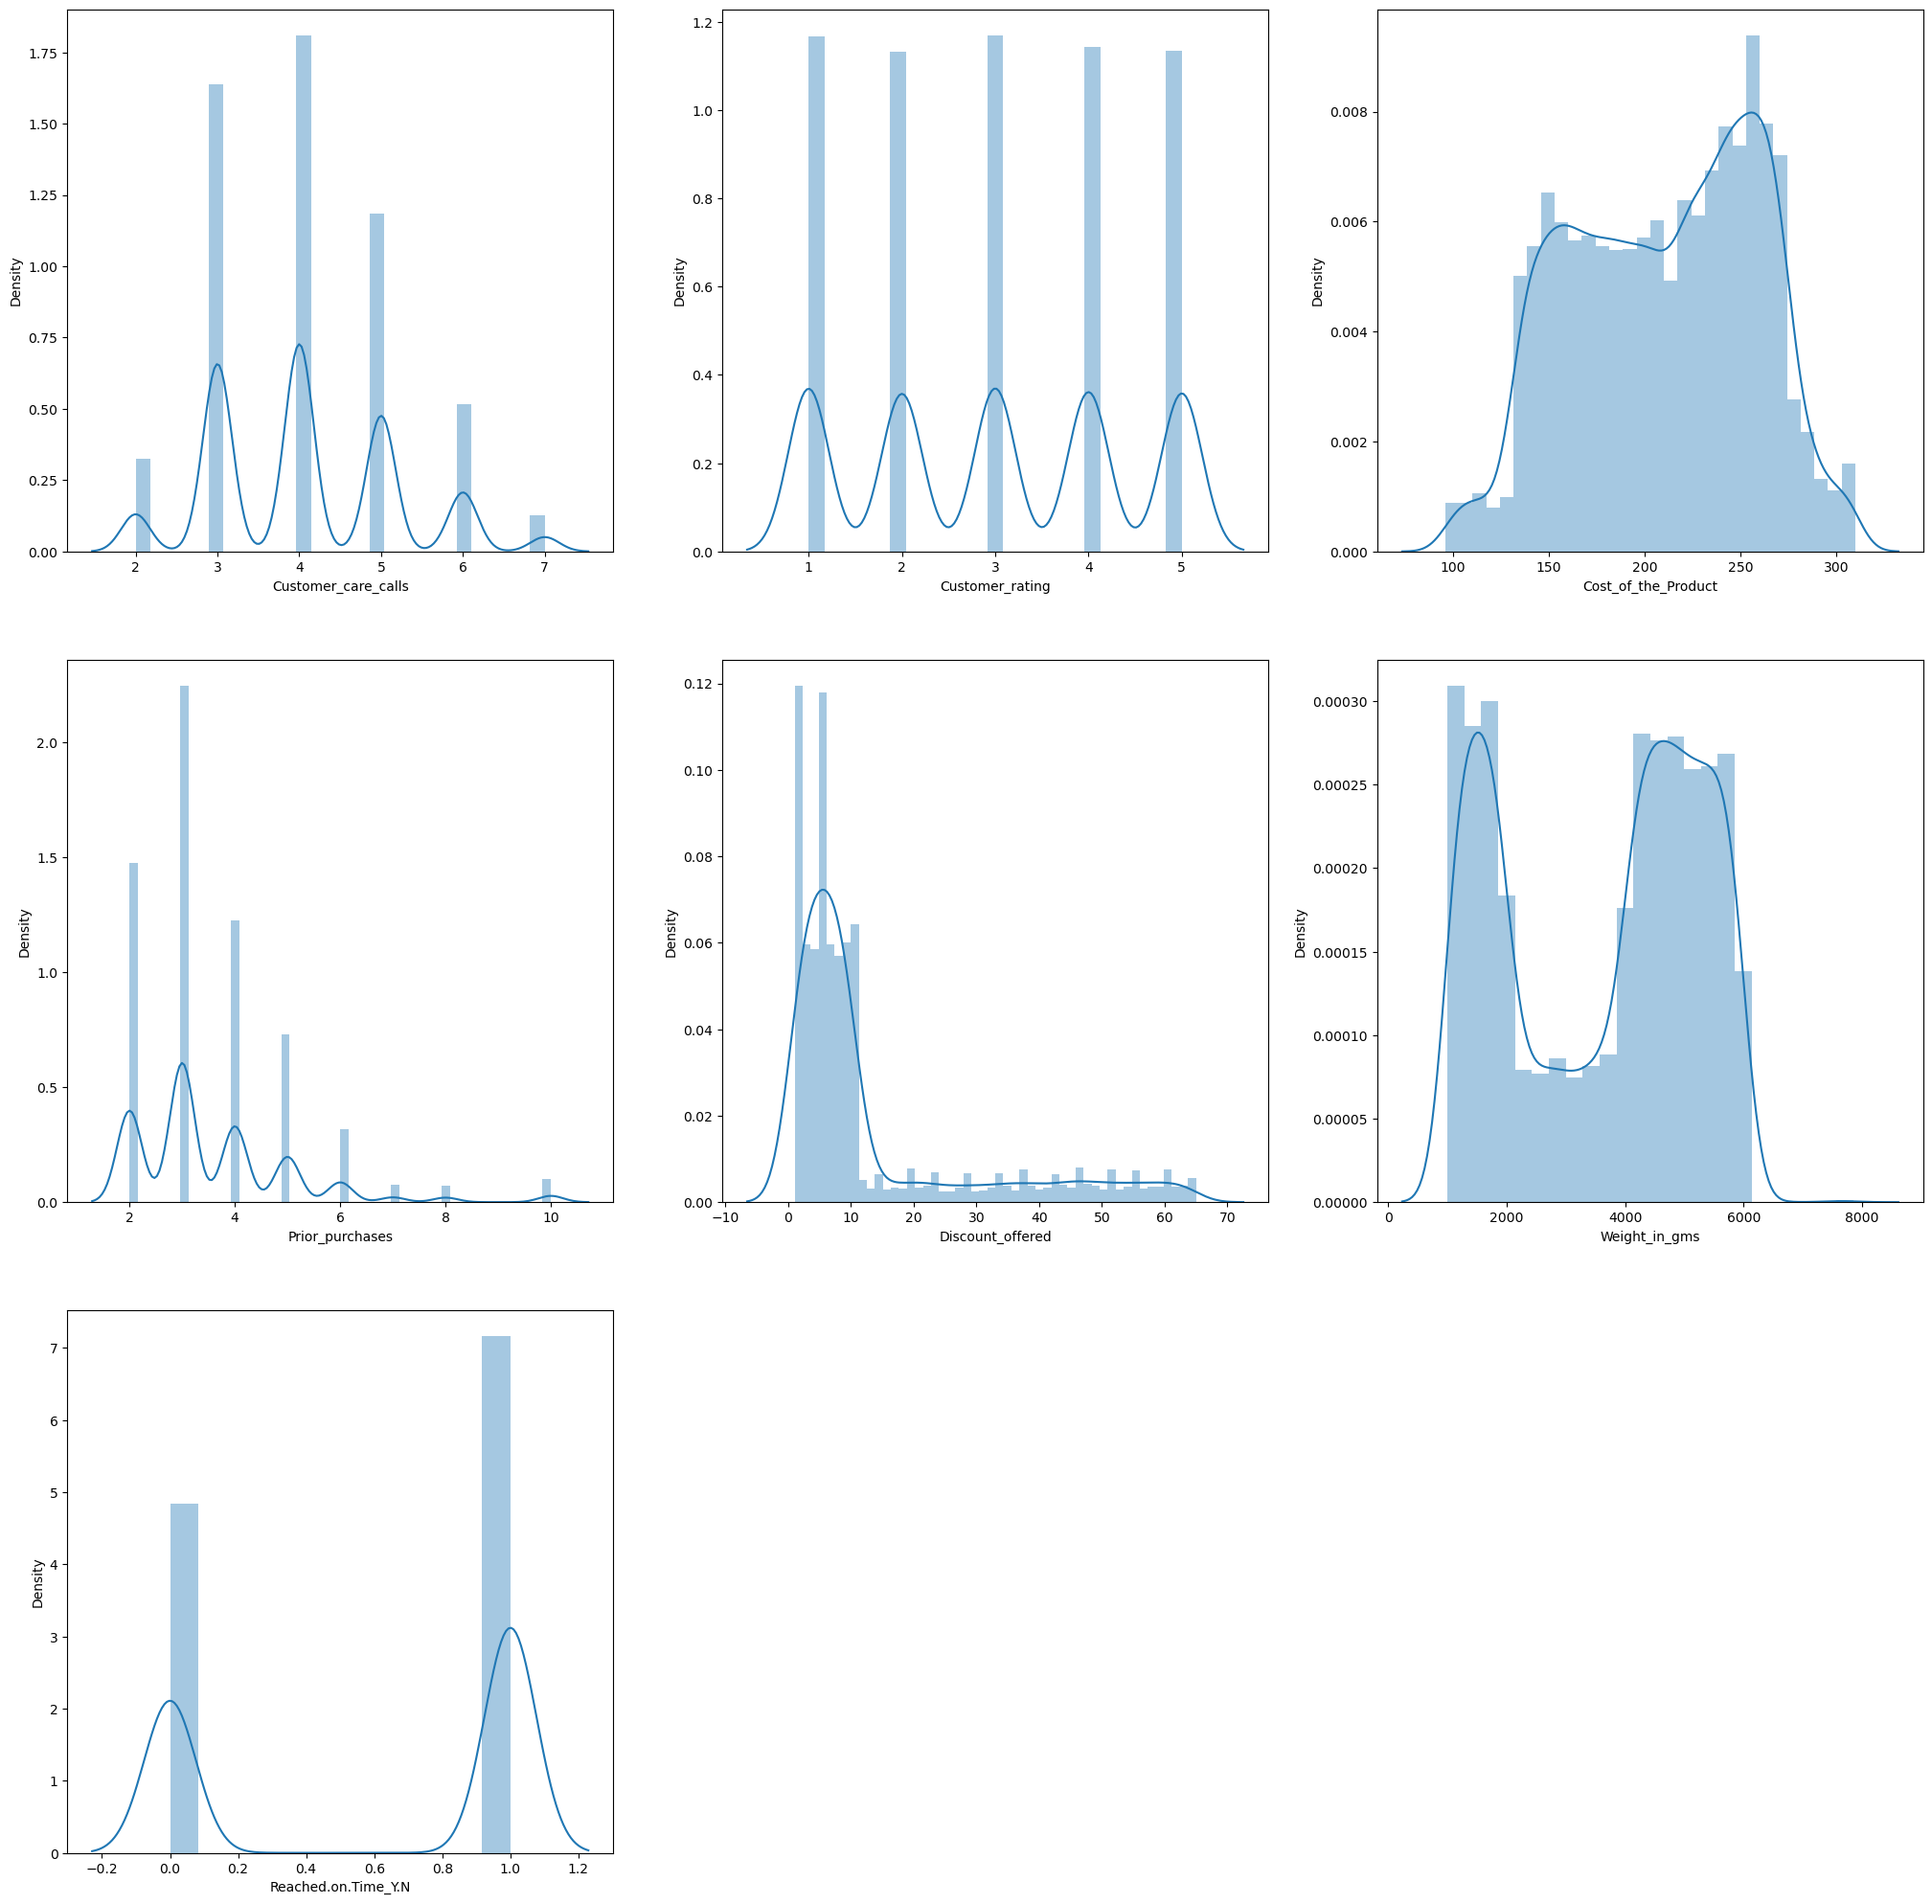

In [20]:
plt.figure(figsize=(25,25))
plotnumber = 1

for column in Numerical_col:
  if plotnumber <= 10:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(Numerical_col[column])
    plt.xlabel(column)
  plotnumber+=1
plt.show()

[]

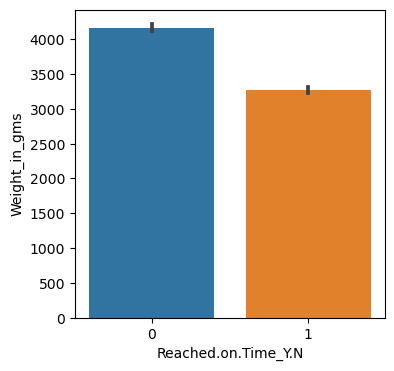

In [21]:
# Heavy weight items are most likely to be late than light weight

plt.figure(figsize=(4,4))
sns.barplot(data = data, x = "Reached.on.Time_Y.N",y = "Weight_in_gms")
plt.plot()

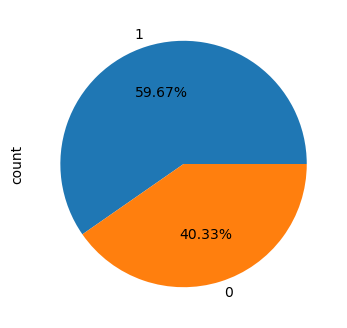

In [22]:
plt.figure(figsize=(4,4))
data['Reached.on.Time_Y.N'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

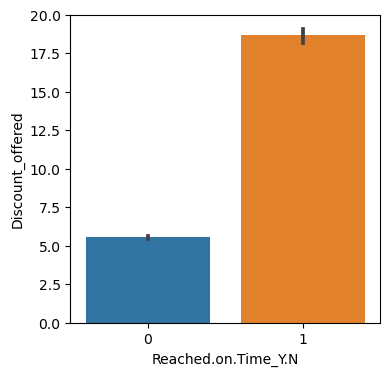

In [23]:
plt.figure(figsize=(4,4))
sns.barplot(data=data, x = "Reached.on.Time_Y.N", y = "Discount_offered")
plt.show()

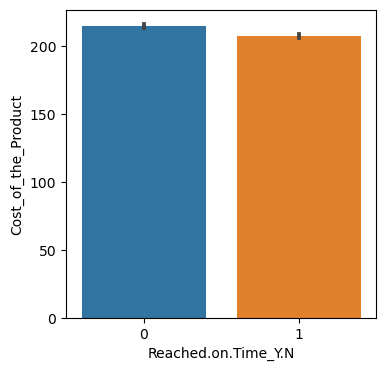

In [24]:
plt.figure(figsize=(4,4))
sns.barplot(data=data, x = "Reached.on.Time_Y.N", y = "Cost_of_the_Product")
plt.show()

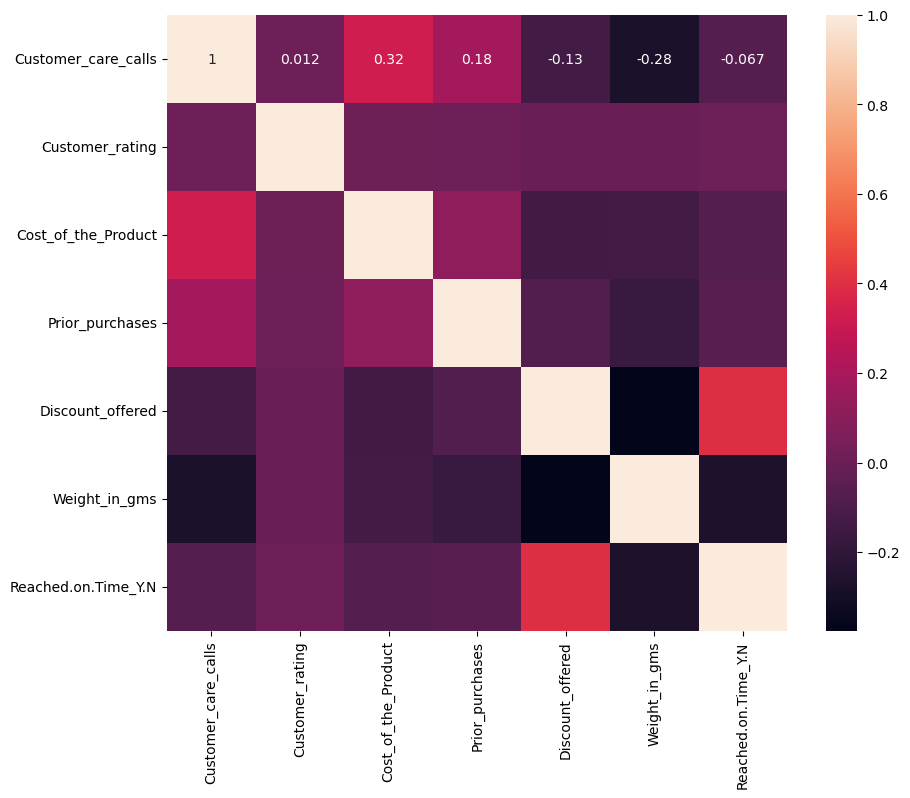

In [25]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,8))
sns.heatmap(Numerical_col.corr(),annot = True)
plt.show()

## Concatenate Categorical and Numerical

In [26]:
df = pd.concat([Categorical_col,Numerical_col],axis=1)
df.head()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,1,0,4,2,177,3,44,1233,1
1,4,0,1,1,4,5,216,2,59,3088,1
2,0,0,1,1,2,2,183,4,48,3374,1
3,1,0,2,1,3,3,176,4,10,1177,1
4,2,0,2,0,2,2,184,3,46,2484,1


In [27]:
df.drop(columns = ["Warehouse_block","Gender"],axis = 1,inplace = True)
df.head()

,Mode_of_Shipment,Product_importance,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,0,1,4,2,177,3,44,1233,1
1,0,1,4,5,216,2,59,3088,1
2,0,1,2,2,183,4,48,3374,1
3,0,2,3,3,176,4,10,1177,1
4,0,2,2,2,184,3,46,2484,1


In [28]:
df.shape

(10999, 9)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Mode_of_Shipment     10999 non-null  int64
 1   Product_importance   10999 non-null  int64
 2   Customer_care_calls  10999 non-null  int64
 3   Customer_rating      10999 non-null  int64
 4   Cost_of_the_Product  10999 non-null  int64
 5   Prior_purchases      10999 non-null  int64
 6   Discount_offered     10999 non-null  int64
 7   Weight_in_gms        10999 non-null  int64
 8   Reached.on.Time_Y.N  10999 non-null  int64
dtypes: int64(9)
memory usage: 773.5 KB


In [30]:
df.describe()

,Mode_of_Shipment,Product_importance,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,1.516865,1.346031,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,0.756894,0.631434,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,0.000000,0.000000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,2.000000,1.000000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,2.000000,2.000000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,2.000000,2.000000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


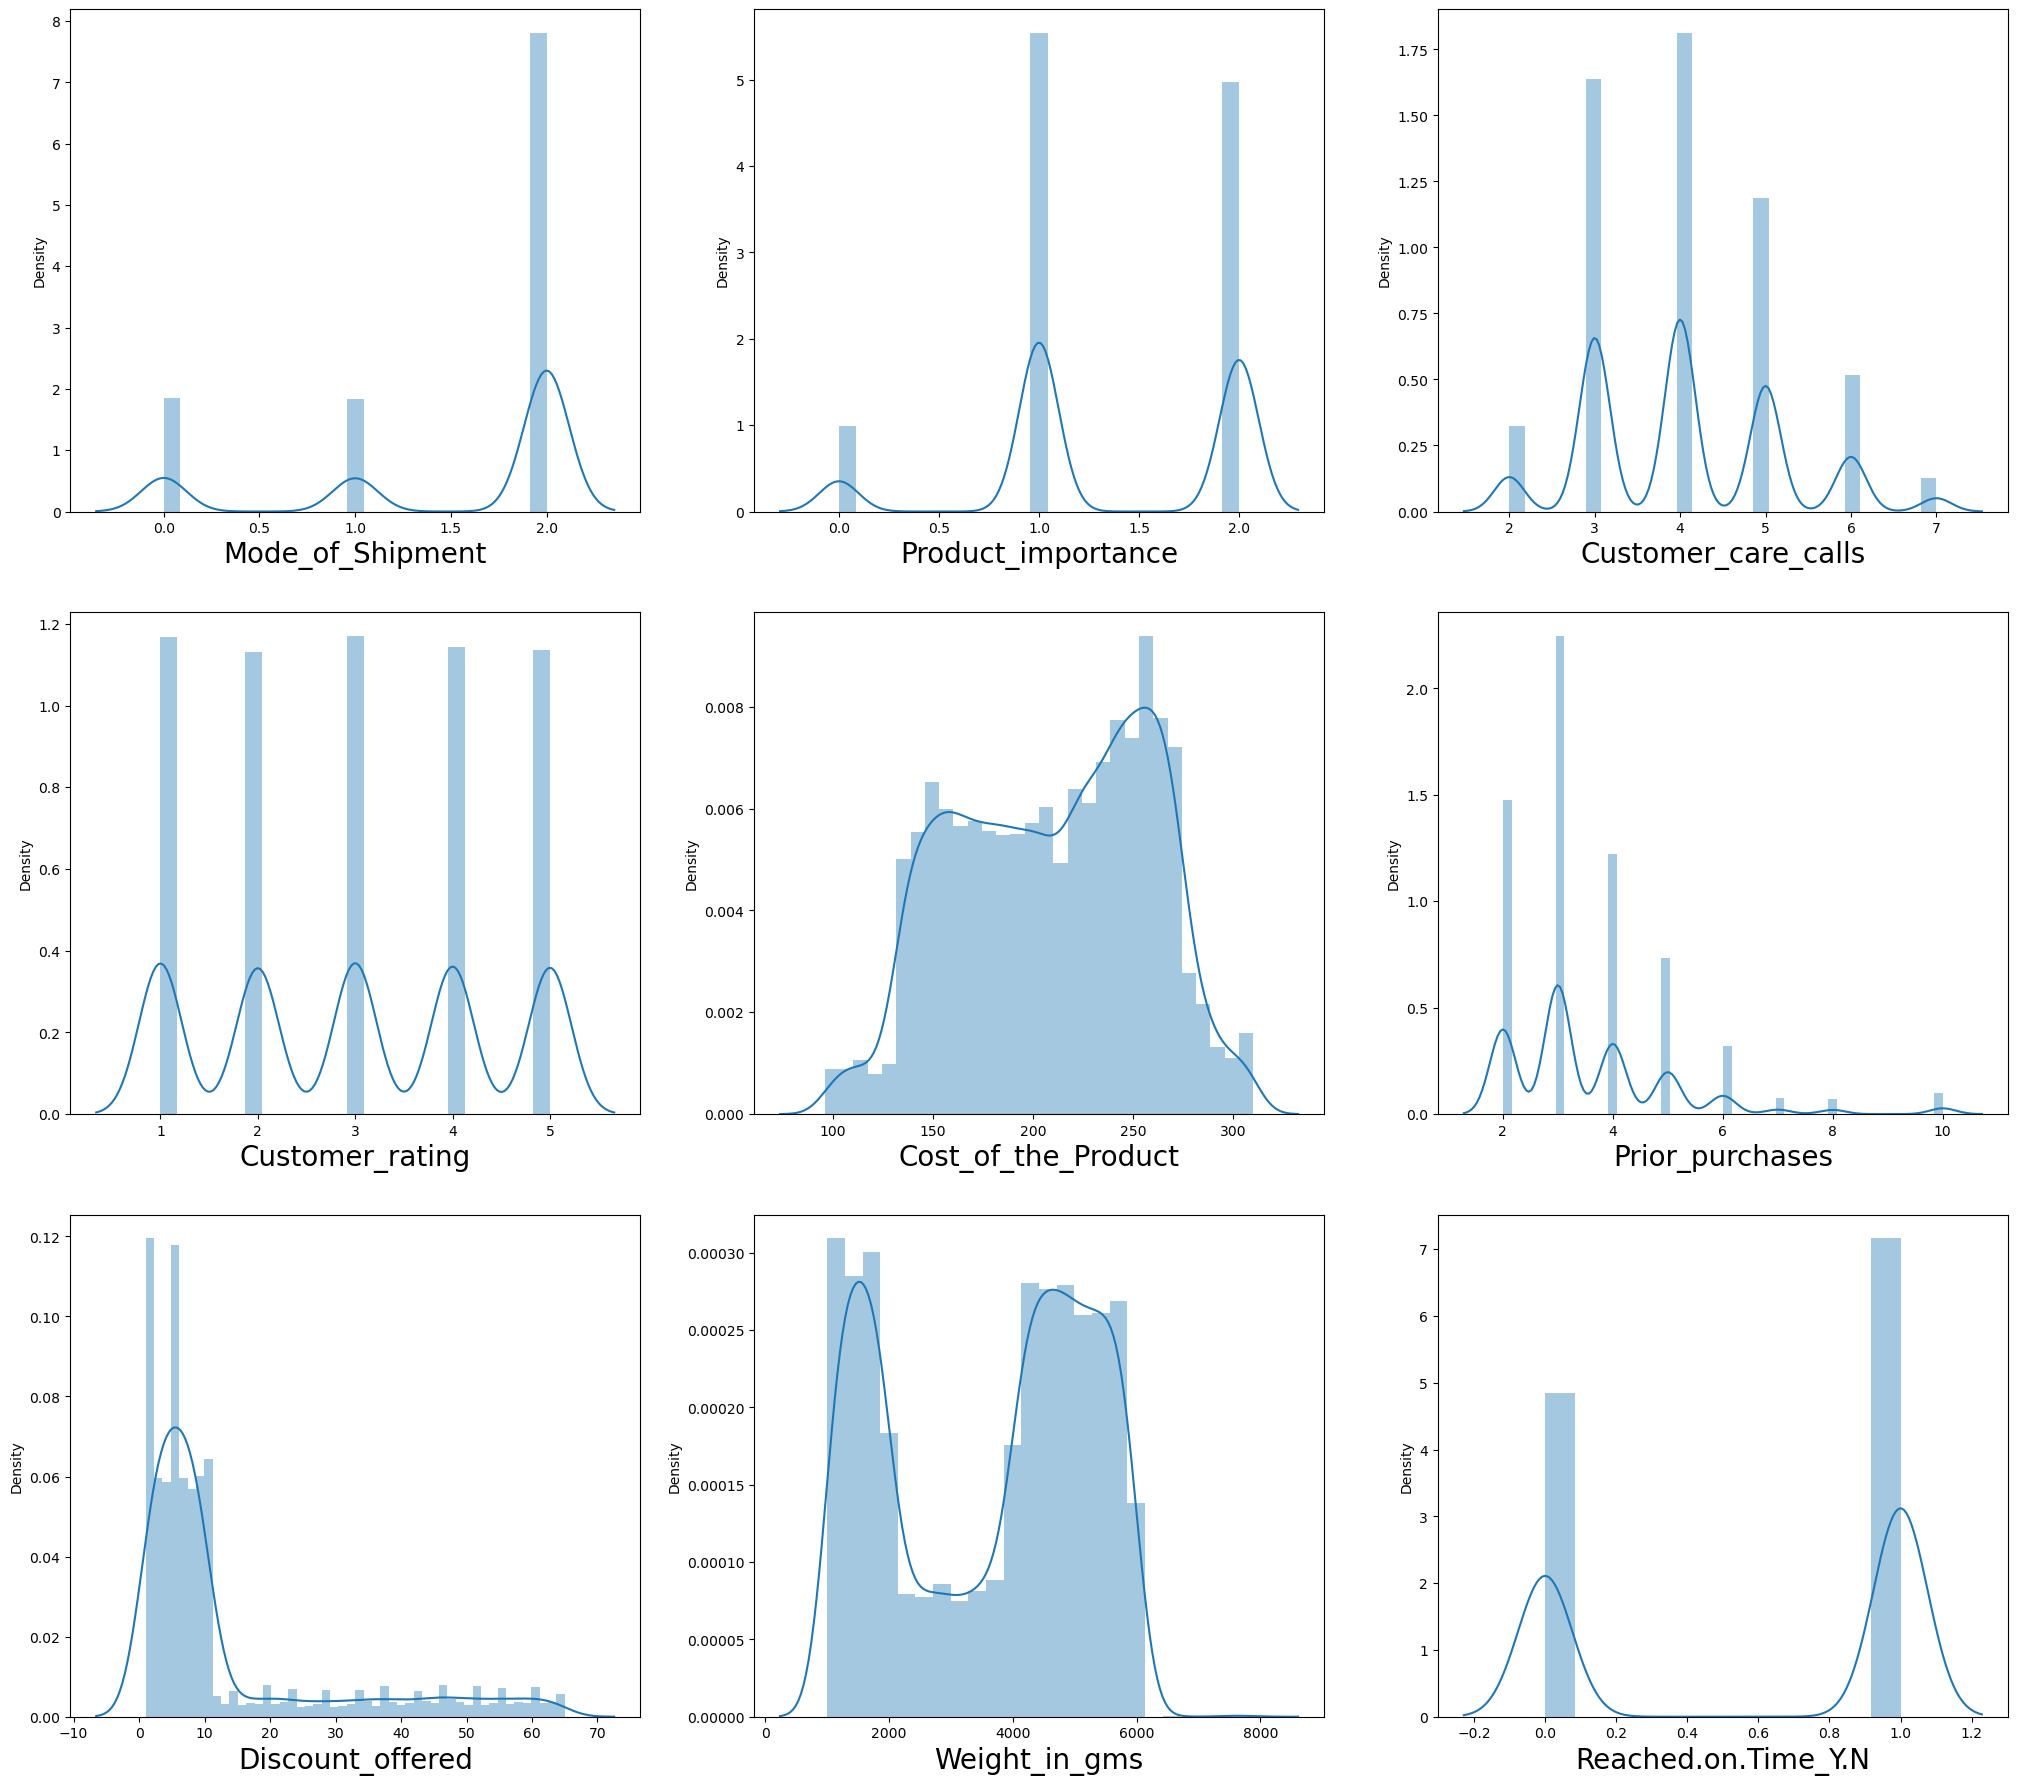

In [31]:
plt.figure(figsize=(25,30))
plotnumber = 1

for column in df:
  if plotnumber <= 15:
    ax = plt.subplot(4,3,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize = 20)
  plotnumber+=1
plt.show()

<Axes: >

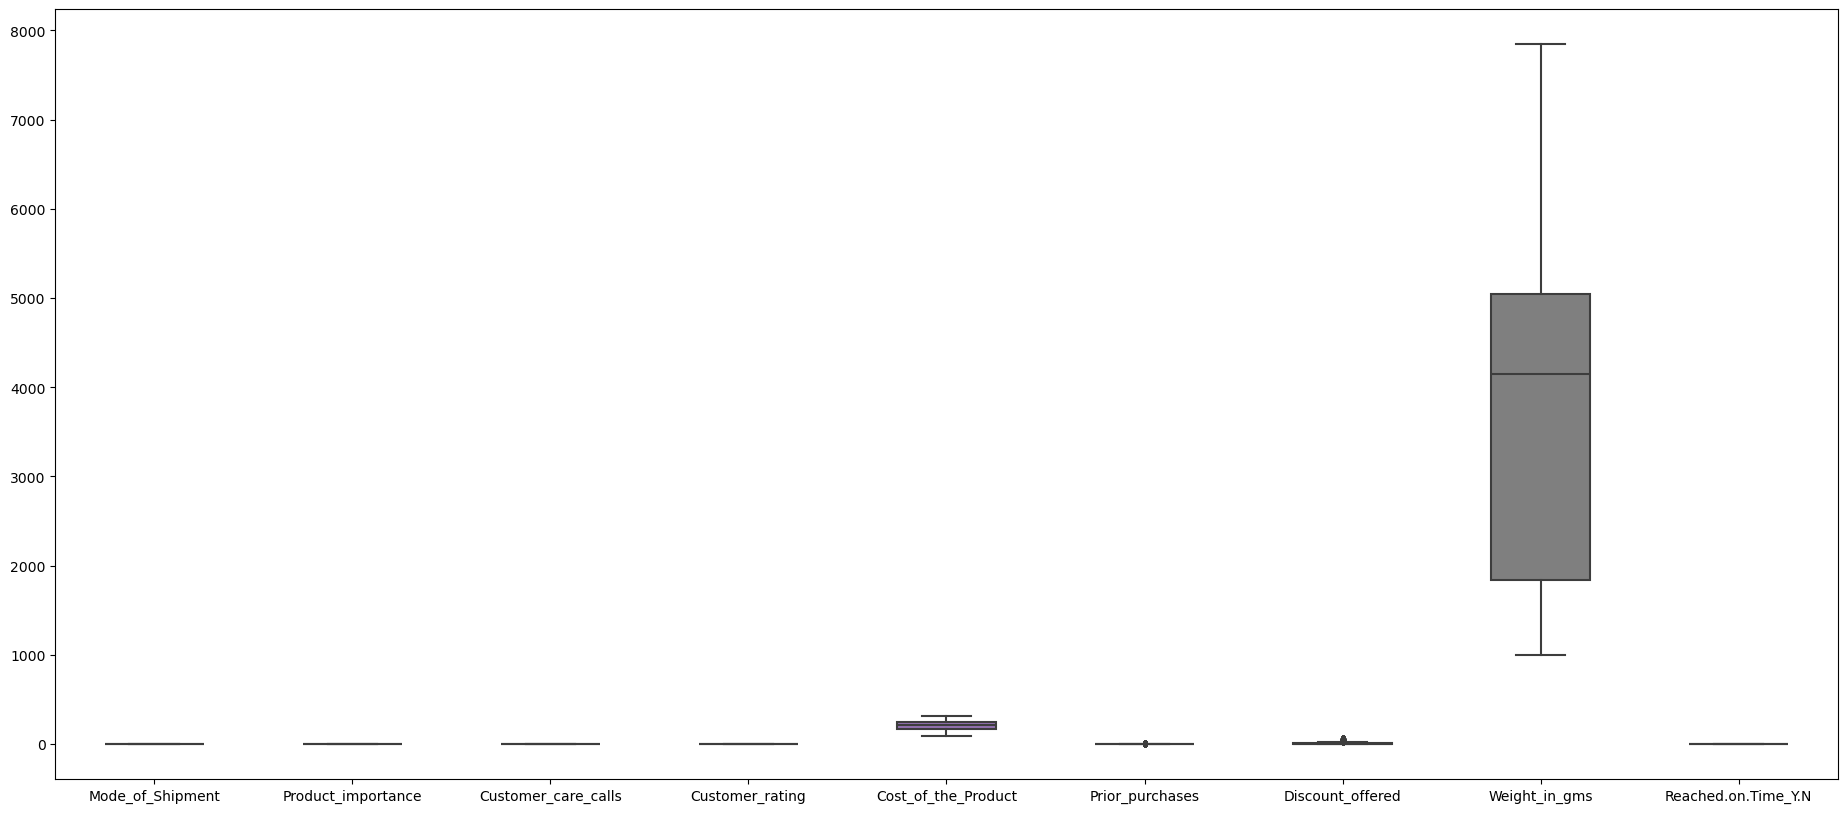

In [32]:
fig,ax = plt.subplots(figsize = (23,10))
sns.boxplot(data=df,width = 0.5,fliersize = 3,ax=ax)

<Figure size 2000x2000 with 0 Axes>

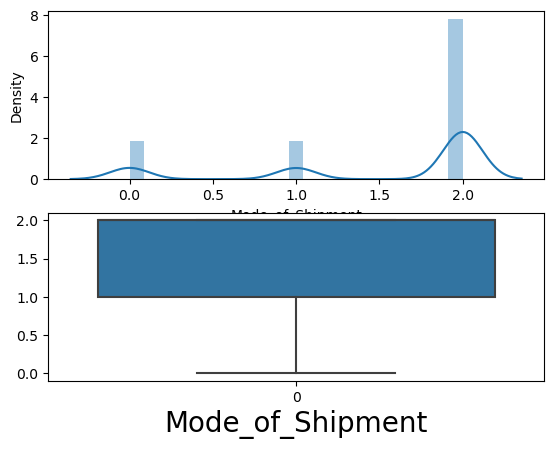

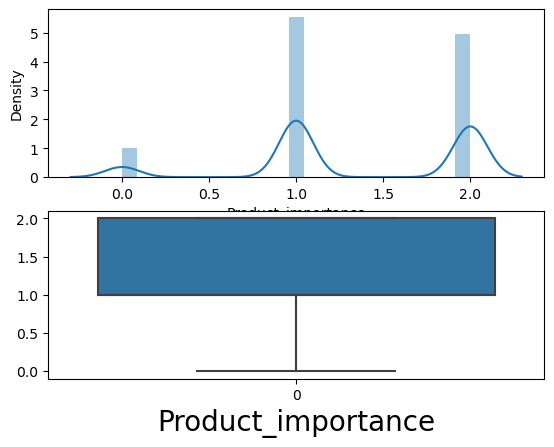

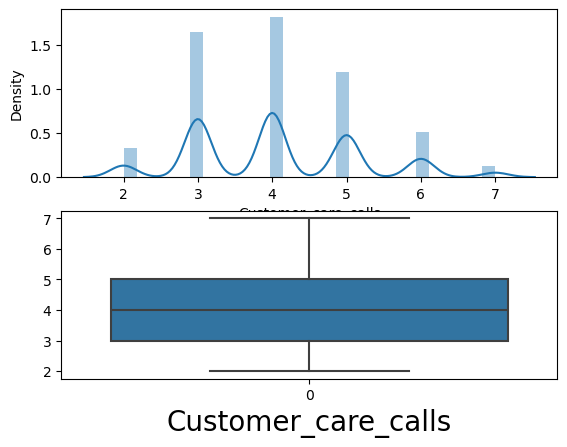

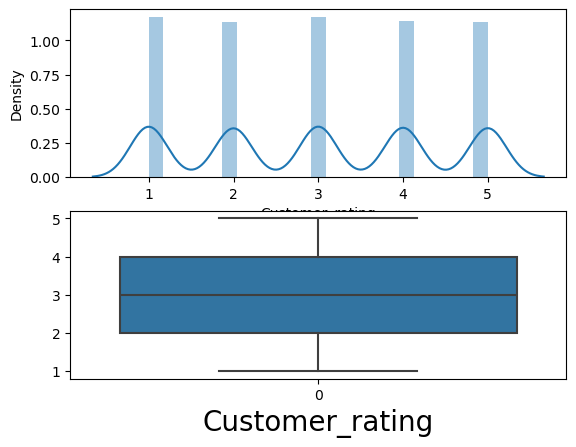

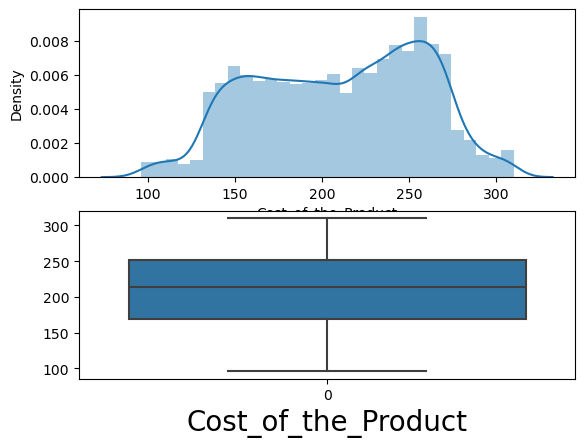

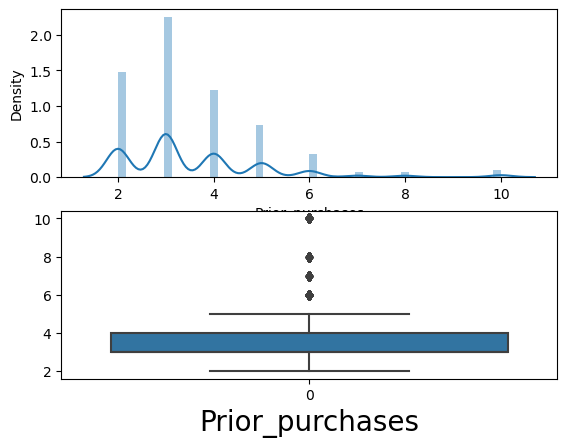

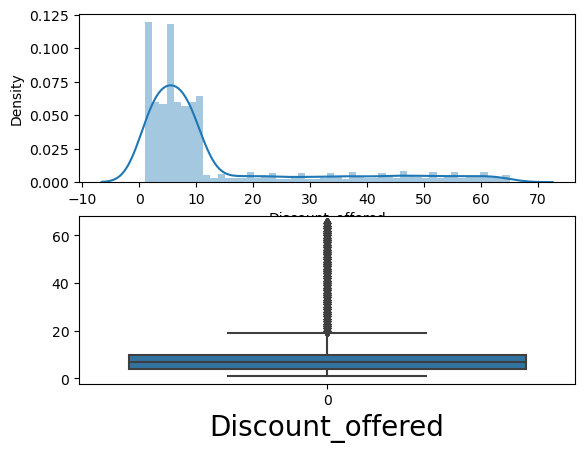

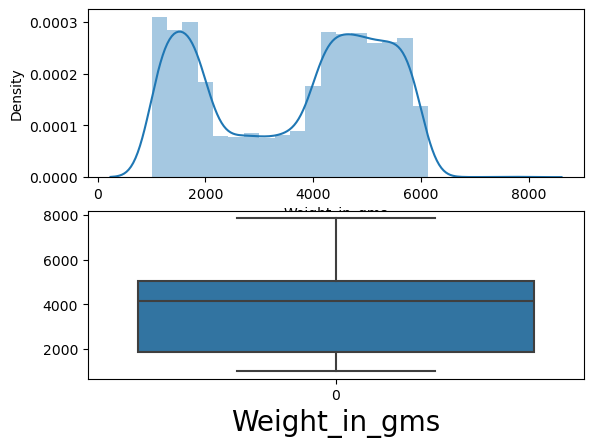

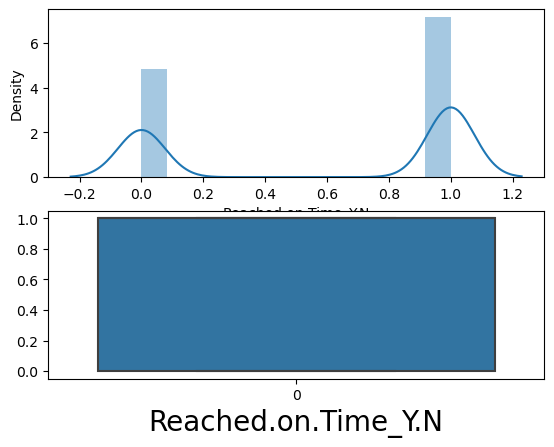

In [33]:
plt.figure(figsize=(20,20))
plotnumber = 1

for column in df:
  if plotnumber <= 15:
    fig,(ax1,ax2)=plt.subplots(2,1) #Subplot 
    sns.distplot(df[column],ax=ax1) #distplot
    sns.boxplot(df[column],ax=ax2) #boxplot
    plt.xlabel(column,fontsize = 20)
  plotnumber+=1
plt.show()

<Axes: >

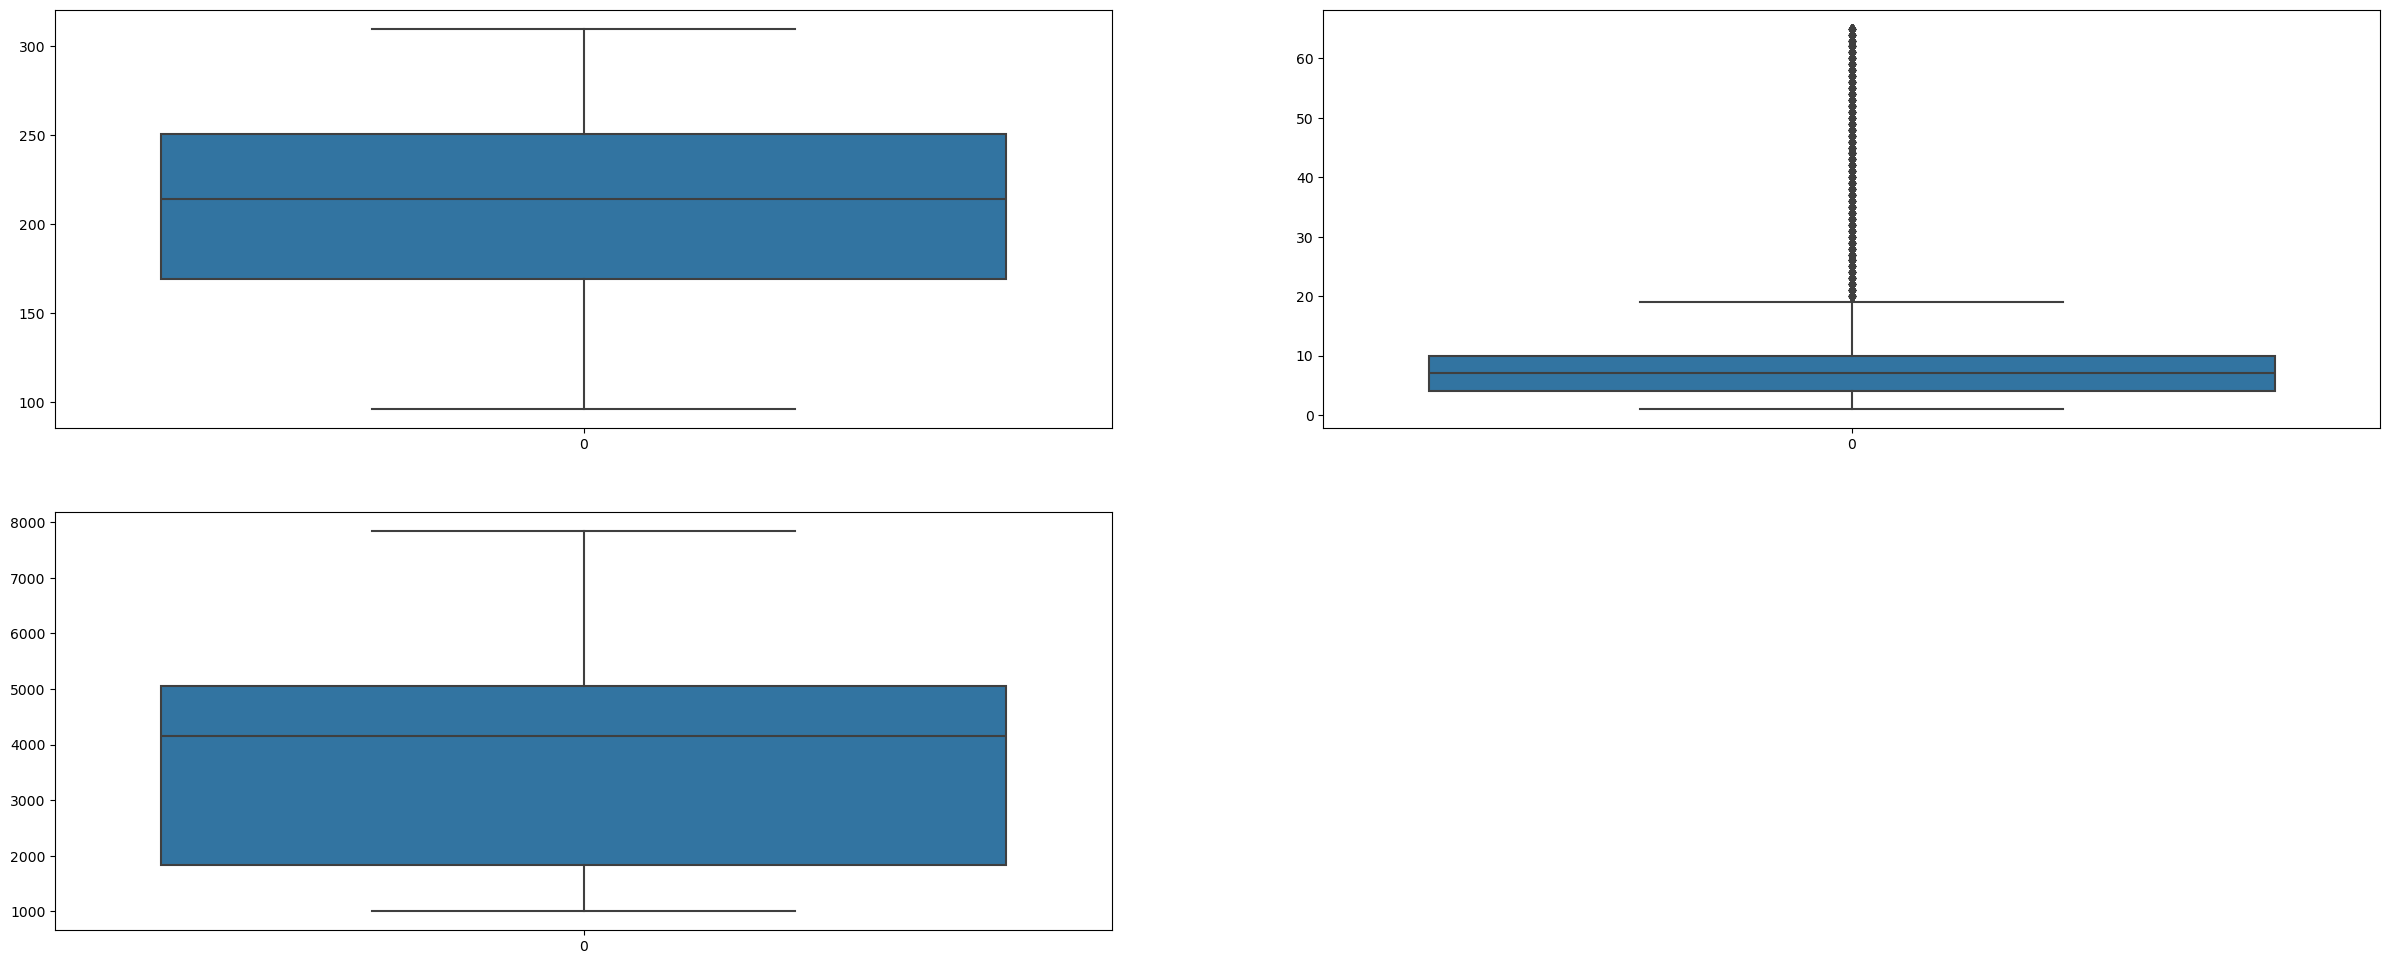

In [34]:
plt.figure(figsize=(30,25))
plt.subplot(4,2,1)
sns.boxplot(df["Cost_of_the_Product"])
plt.subplot(4,2,2)
sns.boxplot(df["Discount_offered"])
plt.subplot(4,2,3)
sns.boxplot(df["Weight_in_gms"])

## Split Independent and Dependent Features

In [35]:
x = df.drop(columns = ["Reached.on.Time_Y.N"],axis = 1)
y = df["Reached.on.Time_Y.N"]

In [36]:
x.head()

,Mode_of_Shipment,Product_importance,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
0,0,1,4,2,177,3,44,1233
1,0,1,4,5,216,2,59,3088
2,0,1,2,2,183,4,48,3374
3,0,2,3,3,176,4,10,1177
4,0,2,2,2,184,3,46,2484


In [37]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Reached.on.Time_Y.N, dtype: int64

In [38]:
x.values

array([[   0,    1,    4, ...,    3,   44, 1233],
       [   0,    1,    4, ...,    2,   59, 3088],
       [   0,    1,    2, ...,    4,   48, 3374],
       ...,
       [   2,    1,    5, ...,    5,    4, 1155],
       [   2,    2,    5, ...,    6,    2, 1210],
       [   2,    1,    2, ...,    5,    6, 1639]])

In [39]:
y.values

array([1, 1, 1, ..., 0, 0, 0])

In [40]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x)
x_train

array([[-2.00415767, -0.54803358, -0.04771132, ..., -0.37273475,
         1.88998336, -1.46823975],
       [-2.00415767, -0.54803358, -0.04771132, ..., -1.02942377,
         2.81563557, -0.33389333],
       [-2.00415767, -0.54803358, -1.79988745, ...,  0.28395426,
         2.13682395, -0.15900218],
       ...,
       [ 0.63834175, -0.54803358,  0.82837675, ...,  0.94064328,
        -0.57842252, -1.51593733],
       [ 0.63834175,  1.03573451,  0.82837675, ...,  1.5973323 ,
        -0.70184282, -1.48230442],
       [ 0.63834175, -0.54803358, -1.79988745, ...,  0.94064328,
        -0.45500223, -1.2199677 ]])

In [41]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [42]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8799, 8)
(2200, 8)
(8799,)
(2200,)


## 1. Logistic Regression

In [43]:
lr=LogisticRegression()

In [44]:
# Training the Model
lr.fit(x_train,y_train)

LogisticRegression()

In [45]:
y_pred = lr.predict(x_test)

In [46]:
#Evaluation for Logistic Regression
# Accuracy,F1_Score, Precision_Score,Recall_Score
print("Confusion Matrix :\n ",(confusion_matrix(y_test,y_pred)))
print()
print("Accuracy_Score: ", round(accuracy_score(y_test,y_pred)*100,3),"%")
print()
print("F1 Score: ", round(f1_score(y_test,y_pred)*100,3))
print("Precision Score: ", round(precision_score(y_test,y_pred)*100,3))
print("Recall Score :", round(recall_score(y_test,y_pred)*100,3))
print("AUC Score :", round(roc_auc_score(y_test,y_pred)*100,3))
print("\n")
#Entire Report of the Model
print("Entire Report of the Model: \n", (classification_report(y_test,y_pred)))
plt.show()

Confusion Matrix :
  [[531 377]
 [437 855]]

Accuracy_Score:  63.0 %

F1 Score:  67.75
Precision Score:  69.399
Recall Score : 66.176
AUC Score : 62.328


Entire Report of the Model: 
               precision    recall  f1-score   support

           0       0.55      0.58      0.57       908
           1       0.69      0.66      0.68      1292

    accuracy                           0.63      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.63      0.63      0.63      2200



In [47]:
# Using Hyperparameters

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
hyperparameters = dict(penalty=penalty, C=C , solver=solver)

# Initializing
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
model = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='roc_auc')

# Fitting Model & Evaluation
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Confusion Matrix :\n ",(confusion_matrix(y_test,y_pred)))
print()
print("Accuracy_Score: ", round(accuracy_score(y_test,y_pred)*100,3),"%")
print()
print("F1 Score: ", round(f1_score(y_test,y_pred)*100,3))
print("Precision Score: ", round(precision_score(y_test,y_pred)*100,3))
print("Recall Score :", round(recall_score(y_test,y_pred)*100,3))
print("AUC Score :", round(roc_auc_score(y_test,y_pred)*100,3))
print("\n")
#Entire Report of the Model
print("Entire Report of the Model: \n", (classification_report(y_test,y_pred)))
plt.show()

Confusion Matrix :
  [[512 396]
 [369 923]]

Accuracy_Score:  65.227 %

F1 Score:  70.701
Precision Score:  69.977
Recall Score : 71.44
AUC Score : 63.914


Entire Report of the Model: 
               precision    recall  f1-score   support

           0       0.58      0.56      0.57       908
           1       0.70      0.71      0.71      1292

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.65      0.65      2200



## 2. Decision Tree Classifier

In [48]:
df=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [49]:
df.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [50]:
y_pred=df.predict(x_test)

In [51]:
#Evaluation for Decision Tree Classifier
# Accuracy,F1_Score, Precision_Score,Recall_Score
print("Confusion Matrix :\n ",(confusion_matrix(y_test,y_pred)))
print()
print("Accuracy_Score: ", round(accuracy_score(y_test,y_pred)*100,3),"%")
print()
print("F1 Score: ", round(f1_score(y_test,y_pred)*100,3))
print("Precision Score: ", round(precision_score(y_test,y_pred)*100,3))
print("Recall Score :", round(recall_score(y_test,y_pred)*100,3))
print("AUC Score :", round(roc_auc_score(y_test,y_pred)*100,3))
print("\n")
#Entire Report of the Model
print("Entire Report of the Model: \n", (classification_report(y_test,y_pred)))
plt.show()

Confusion Matrix :
  [[508 400]
 [392 900]]

Accuracy_Score:  64.0 %

F1 Score:  69.444
Precision Score:  69.231
Recall Score : 69.659
AUC Score : 62.803


Entire Report of the Model: 
               precision    recall  f1-score   support

           0       0.56      0.56      0.56       908
           1       0.69      0.70      0.69      1292

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200



In [52]:
# Using Hyperparameters

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# List of Hyperparameters
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)]
min_samples_split = [2, 5, 10, 100]
min_samples_leaf = [1, 2, 4, 10, 20, 50]
max_features = ['auto', 'sqrt']
criterion = ['gini', 'entropy']
splitter = ['best', 'random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Initializing
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
model.fit(x_train, y_train)

# Predict & Evaluation
y_pred = model.predict(x_test)
# Accuracy,F1_Score, Precision_Score,Recall_Score
print("Confusion Matrix :\n ",(confusion_matrix(y_test,y_pred)))
print()
print("Accuracy_Score: ", round(accuracy_score(y_test,y_pred)*100,3),"%")
print()
print("F1 Score: ", round(f1_score(y_test,y_pred)*100,3))
print("Precision Score: ", round(precision_score(y_test,y_pred)*100,3))
print("Recall Score :", round(recall_score(y_test,y_pred)*100,3))
print("AUC Score :", round(roc_auc_score(y_test,y_pred)*100,3))
print("\n")
#Entire Report of the Model
print("Entire Report of the Model: \n", (classification_report(y_test,y_pred)))
plt.show()

Confusion Matrix :
  [[559 349]
 [428 864]]

Accuracy_Score:  64.682 %

F1 Score:  68.982
Precision Score:  71.228
Recall Score : 66.873
AUC Score : 64.218


Entire Report of the Model: 
               precision    recall  f1-score   support

           0       0.57      0.62      0.59       908
           1       0.71      0.67      0.69      1292

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.65      0.65      2200



## 3. Random Forest Classifier

In [53]:
rf=RandomForestClassifier()

In [54]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [55]:
y_pred=rf.predict(x_test)

In [56]:
#Evaluation for Random Forest Classifier
# Accuracy,F1_Score, Precision_Score,Recall_Score
print("Confusion Matrix :\n ",(confusion_matrix(y_test,y_pred)))
print()
print("Accuracy_Score: ", round(accuracy_score(y_test,y_pred)*100,3),"%")
print()
print("F1 Score: ", round(f1_score(y_test,y_pred)*100,3))
print("Precision Score: ", round(precision_score(y_test,y_pred)*100,3))
print("Recall Score :", round(recall_score(y_test,y_pred)*100,3))
print("AUC Score :", round(roc_auc_score(y_test,y_pred)*100,3))
print("\n")
#Entire Report of the Model
print("Entire Report of the Model: \n", (classification_report(y_test,y_pred)))
plt.show()

Confusion Matrix :
  [[607 301]
 [472 820]]

Accuracy_Score:  64.864 %

F1 Score:  67.965
Precision Score:  73.149
Recall Score : 63.467
AUC Score : 65.159


Entire Report of the Model: 
               precision    recall  f1-score   support

           0       0.56      0.67      0.61       908
           1       0.73      0.63      0.68      1292

    accuracy                           0.65      2200
   macro avg       0.65      0.65      0.65      2200
weighted avg       0.66      0.65      0.65      2200



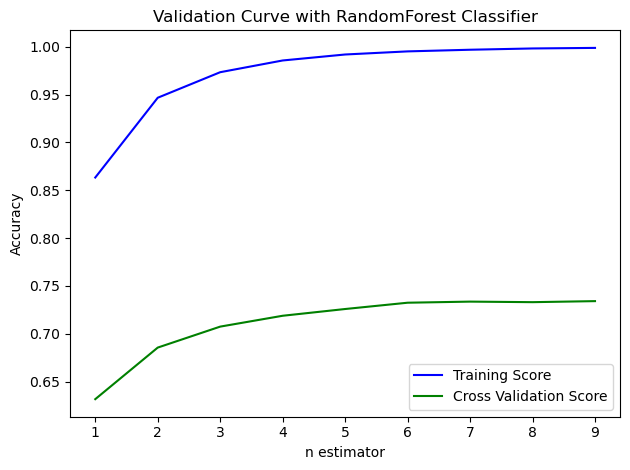

In [57]:
# Hyperparameter Tuning Random Forest
from sklearn.model_selection import validation_curve
parameter_range = np.arange(1, 10, 1)

train_score, test_score = validation_curve(
                                RandomForestClassifier(random_state = 42),
                                X = x_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = parameter_range,
                                cv = 5,
                                scoring = 'roc_auc') 


# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with RandomForest Classifier")
plt.xlabel("n estimator")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

## 4. SVM

In [58]:
from sklearn.svm import SVC

In [59]:
# Initializing SVM
svm = SVC(kernel="rbf")

In [60]:
# Training model
fit = svm.fit(x_train,y_train)

In [61]:
# Testing model
y_pred = fit.predict(x_test)

In [62]:
#Evaluation for SVM
# Accuracy,F1_Score, Precision_Score,Recall_Score
print("Confusion Matrix :\n ",(confusion_matrix(y_test,y_pred)))
print()
print("Accuracy_Score: ", round(accuracy_score(y_test,y_pred)*100,3),"%")
print()
print("F1 Score: ", round(f1_score(y_test,y_pred)*100,3))
print("Precision Score: ", round(precision_score(y_test,y_pred)*100,3))
print("Recall Score :", round(recall_score(y_test,y_pred)*100,3))
print("AUC Score :", round(roc_auc_score(y_test,y_pred)*100,3))
print("\n")
#Entire Report of the Model
print("Entire Report of the Model: \n", (classification_report(y_test,y_pred)))
plt.show()

Confusion Matrix :
  [[566 342]
 [402 890]]

Accuracy_Score:  66.182 %

F1 Score:  70.523
Precision Score:  72.24
Recall Score : 68.885
AUC Score : 65.61


Entire Report of the Model: 
               precision    recall  f1-score   support

           0       0.58      0.62      0.60       908
           1       0.72      0.69      0.71      1292

    accuracy                           0.66      2200
   macro avg       0.65      0.66      0.65      2200
weighted avg       0.67      0.66      0.66      2200



## 5. XGBoost

In [63]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [64]:
from xgboost import XGBClassifier

In [65]:
xg = XGBClassifier(random_state=42)

In [66]:
xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [67]:
y_pred = xg.predict(x_test)

In [68]:
#Evaluation for XGBoost
# Accuracy,F1_Score, Precision_Score,Recall_Score
print("Confusion Matrix :\n ",(confusion_matrix(y_test,y_pred)))
print()
print("Accuracy_Score: ", round(accuracy_score(y_test,y_pred)*100,3),"%")
print()
print("F1 Score: ", round(f1_score(y_test,y_pred)*100,3))
print("Precision Score: ", round(precision_score(y_test,y_pred)*100,3))
print("Recall Score :", round(recall_score(y_test,y_pred)*100,3))
print("AUC Score :", round(roc_auc_score(y_test,y_pred)*100,3))
print("\n")
#Entire Report of the Model
print("Entire Report of the Model: \n", (classification_report(y_test,y_pred)))
plt.show()

Confusion Matrix :
  [[567 341]
 [442 850]]

Accuracy_Score:  64.409 %

F1 Score:  68.466
Precision Score:  71.369
Recall Score : 65.789
AUC Score : 64.117


Entire Report of the Model: 
               precision    recall  f1-score   support

           0       0.56      0.62      0.59       908
           1       0.71      0.66      0.68      1292

    accuracy                           0.64      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.64      0.65      2200



## 6. KNN

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn = KNeighborsClassifier()

In [71]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [72]:
y_pred = knn.predict(x_test)

In [73]:
#Evaluation for KNN
# Accuracy,F1_Score, Precision_Score,Recall_Score
print("Confusion Matrix :\n ",(confusion_matrix(y_test,y_pred)))
print()
print("Accuracy_Score: ", round(accuracy_score(y_test,y_pred)*100,3),"%")
print()
print("F1 Score: ", round(f1_score(y_test,y_pred)*100,3))
print("Precision Score: ", round(precision_score(y_test,y_pred)*100,3))
print("Recall Score :", round(recall_score(y_test,y_pred)*100,3))
print("AUC Score :", round(roc_auc_score(y_test,y_pred)*100,3))
print("\n")
#Entire Report of the Model
print("Entire Report of the Model: \n", (classification_report(y_test,y_pred)))
plt.show()

Confusion Matrix :
  [[556 352]
 [409 883]]

Accuracy_Score:  65.409 %

F1 Score:  69.885
Precision Score:  71.498
Recall Score : 68.344
AUC Score : 64.789


Entire Report of the Model: 
               precision    recall  f1-score   support

           0       0.58      0.61      0.59       908
           1       0.71      0.68      0.70      1292

    accuracy                           0.65      2200
   macro avg       0.65      0.65      0.65      2200
weighted avg       0.66      0.65      0.66      2200



In [74]:
# Using Hyperparameters

from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import uniform

# List of Hyperparameters
n_neighbors = list(range(2,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init model
knn = KNeighborsClassifier()
model = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42, scoring='roc_auc')

# Fit Model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
# Accuracy,F1_Score, Precision_Score,Recall_Score
print("Confusion Matrix :\n ",(confusion_matrix(y_test,y_pred)))
print()
print("Accuracy_Score: ", round(accuracy_score(y_test,y_pred)*100,3),"%")
print()
print("F1 Score: ", round(f1_score(y_test,y_pred)*100,3))
print("Precision Score: ", round(precision_score(y_test,y_pred)*100,3))
print("Recall Score :", round(recall_score(y_test,y_pred)*100,3))
print("AUC Score :", round(roc_auc_score(y_test,y_pred)*100,3))
print("\n")
#Entire Report of the Model
print("Entire Report of the Model: \n", (classification_report(y_test,y_pred)))
plt.show()

Confusion Matrix :
  [[686 222]
 [533 759]]

Accuracy_Score:  65.682 %

F1 Score:  66.784
Precision Score:  77.37
Recall Score : 58.746
AUC Score : 67.148


Entire Report of the Model: 
               precision    recall  f1-score   support

           0       0.56      0.76      0.65       908
           1       0.77      0.59      0.67      1292

    accuracy                           0.66      2200
   macro avg       0.67      0.67      0.66      2200
weighted avg       0.69      0.66      0.66      2200



# ANN

In [75]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense

In [76]:
model=Sequential()

In [77]:
x.shape

(10999, 8)

In [78]:
model.add(Dense(units=13,activation='relu',kernel_initializer='random_uniform'))

In [79]:
model.add(Dense(units=26,activation='relu',kernel_initializer='random_uniform'))

In [80]:
model.add(Dense(units=26,activation='relu',kernel_initializer='random_uniform'))

In [81]:
model.add(Dense(units=1,activation='sigmoid',kernel_initializer='random_uniform'))

In [82]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [83]:
model.fit(x_train,y_train,batch_size=32,epochs=20)

Epoch 1/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 367us/step - accuracy: 0.5981 - loss: 0.6836
Epoch 2/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 0.6604 - loss: 0.5632
Epoch 3/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.6558 - loss: 0.5329
Epoch 4/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.6453 - loss: 0.5302
Epoch 5/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.6510 - loss: 0.5336
Epoch 6/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.6722 - loss: 0.5164
Epoch 7/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - accuracy: 0.6694 - loss: 0.5205
Epoch 8/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.6759 - loss: 0.5104
Epoch 9/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - accuracy: 0.6777 - loss: 0.5121
Epoch 10/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.6682 - loss: 0.5183
Epoch 11/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - accuracy: 0.6652 - loss: 0.5117
Epoch 12/20
275/275 ━━━━━━━━━━

In [84]:
ypred=model.predict(x_test)

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step


In [85]:
ypred

array([[0.47577542],
       [0.50605214],
       [0.99780405],
       ...,
       [0.49881923],
       [0.97035396],
       [0.47426158]], dtype=float32)

In [86]:
ypred=ypred>0.5
ypred

array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [ True],
       [False]])

In [87]:
y_test.values.flatten()

array([1, 0, 1, ..., 0, 1, 0])

In [88]:
y_test.iloc[0]

1

In [89]:
ypred[0]

array([False])

In [90]:
data.head(1)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1


In [91]:
x.shape

(10999, 8)

In [93]:
p=np.array(scaler.transform(np.array(le.transform([['Flight',42,5,1234,0,'high',20,450]]))))

ValueError: y should be a 1d array, got an array of shape (1, 8) instead.

In [94]:
p

[1, 2]

In [95]:
yp=model.predict(p)

ValueError: Unrecognized data type: x=[1, 2] (of type <class 'list'>)

In [96]:
yp

NameError: name 'yp' is not defined

In [97]:
yp=yp>0.5
yp

NameError: name 'yp' is not defined

In [98]:
model.save("model.h5")

In [99]:
import joblib
joblib.dump(le,"modelle")

['modelle']

In [100]:
import pickle
pickle.dump(scaler,open("modelscaler.pkl",'wb'))

In [105]:
data["Product_importance"].unique()

array(['low', 'medium', 'high'], dtype=object)